# <center> INSTAGRAM FAKE NEWS DETECTION </CENTER>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
train_data=pd.read_csv('train.csv')
test_data=pd.read_csv('test.csv')

In [ ]:
train_data

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
0,1,0.27,0,0.00,0,53,0,0,32,1000,955,0
1,1,0.00,2,0.00,0,44,0,0,286,2740,533,0
2,1,0.10,2,0.00,0,0,0,1,13,159,98,0
3,1,0.00,1,0.00,0,82,0,0,679,414,651,0
4,1,0.00,2,0.00,0,0,0,1,6,151,126,0
...,...,...,...,...,...,...,...,...,...,...,...,...
571,1,0.55,1,0.44,0,0,0,0,33,166,596,1
572,1,0.38,1,0.33,0,21,0,0,44,66,75,1
573,1,0.57,2,0.00,0,0,0,0,4,96,339,1
574,1,0.57,1,0.00,0,11,0,0,0,57,73,1


In [ ]:
train_data.head()

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
0,1,0.27,0,0.0,0,53,0,0,32,1000,955,0
1,1,0.00,2,0.0,0,44,0,0,286,2740,533,0
2,1,0.10,2,0.0,0,0,0,1,13,159,98,0
3,1,0.00,1,0.0,0,82,0,0,679,414,651,0
4,1,0.00,2,0.0,0,0,0,1,6,151,126,0


In [ ]:
train_data.tail()

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
571,1,0.55,1,0.44,0,0,0,0,33,166,596,1
572,1,0.38,1,0.33,0,21,0,0,44,66,75,1
573,1,0.57,2,0.00,0,0,0,0,4,96,339,1
574,1,0.57,1,0.00,0,11,0,0,0,57,73,1
575,1,0.27,1,0.00,0,0,0,0,2,150,487,1


In [ ]:
train_data.shape

(576, 12)

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   profile pic           576 non-null    int64  
 1   nums/length username  576 non-null    float64
 2   fullname words        576 non-null    int64  
 3   nums/length fullname  576 non-null    float64
 4   name==username        576 non-null    int64  
 5   description length    576 non-null    int64  
 6   external URL          576 non-null    int64  
 7   private               576 non-null    int64  
 8   #posts                576 non-null    int64  
 9   #followers            576 non-null    int64  
 10  #follows              576 non-null    int64  
 11  fake                  576 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 54.1 KB


In [ ]:
train_data.describe()

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
count,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,5.760000e+02,576.000000,576.000000
mean,0.701389,0.163837,1.460069,0.036094,0.034722,22.623264,0.116319,0.381944,107.489583,8.530724e+04,508.381944,0.500000
std,0.458047,0.214096,1.052601,0.125121,0.183234,37.702987,0.320886,0.486285,402.034431,9.101485e+05,917.981239,0.500435
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.900000e+01,57.500000,0.000000
50%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,1.505000e+02,229.500000,0.500000
75%,1.000000,0.310000,2.000000,0.000000,0.000000,34.000000,0.000000,1.000000,81.500000,7.160000e+02,589.500000,1.000000
max,1.000000,0.920000,12.000000,1.000000,1.000000,150.000000,1.000000,1.000000,7389.000000,1.533854e+07,7500.000000,1.000000


In [ ]:
train_data.isnull().sum()

profile pic             0
nums/length username    0
fullname words          0
nums/length fullname    0
name==username          0
description length      0
external URL            0
private                 0
#posts                  0
#followers              0
#follows                0
fake                    0
dtype: int64

In [ ]:
duplicate_count = train_data.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

Number of duplicate rows: 2


In [ ]:
duplicate_rows = train_data[train_data.duplicated(keep=False)]
print(duplicate_rows)

     profile pic  nums/length username  fullname words  nums/length fullname  \
196            1                  0.00               2                   0.0   
197            1                  0.00               2                   0.0   
491            1                  0.91               1                   0.0   
525            1                  0.91               1                   0.0   

     name==username  description length  external URL  private  #posts  \
196               0                  48             0        0     222   
197               0                  48             0        0     222   
491               0                   0             0        0       0   
525               0                   0             0        0       0   

     #followers  #follows  fake  
196        5282       652     0  
197        5282       652     0  
491          75        26     1  
525          75        26     1  


In [ ]:
train_data_cleaned = train_data.drop_duplicates()
print("\nDataFrame after removing duplicates:")
print(train_data_cleaned)


DataFrame after removing duplicates:
     profile pic  nums/length username  fullname words  nums/length fullname  \
0              1                  0.27               0                  0.00   
1              1                  0.00               2                  0.00   
2              1                  0.10               2                  0.00   
3              1                  0.00               1                  0.00   
4              1                  0.00               2                  0.00   
..           ...                   ...             ...                   ...   
571            1                  0.55               1                  0.44   
572            1                  0.38               1                  0.33   
573            1                  0.57               2                  0.00   
574            1                  0.57               1                  0.00   
575            1                  0.27               1                  0.00   

 

In [ ]:
train_data.nunique()

profile pic               2
nums/length username     54
fullname words            9
nums/length fullname     25
name==username            2
description length      104
external URL              2
private                   2
#posts                  193
#followers              372
#follows                400
fake                      2
dtype: int64

# Univariate Analysis:

In [ ]:
train_data['nums/length username'].value_counts()

0.00    299
0.33     24
0.38     14
0.25     14
0.44     14
0.50     12
0.18     11
0.57     10
0.43     10
0.22     10
0.29      9
0.20      9
0.31      9
0.36      9
0.40      8
0.12      8
0.27      7
0.10      7
0.14      7
0.15      5
0.24      5
0.30      5
0.07      4
0.09      4
0.55      4
0.67      4
0.08      4
0.19      3
0.13      3
0.88      3
0.11      3
0.46      3
0.47      3
0.89      3
0.58      3
0.17      2
0.06      2
0.91      2
0.21      2
0.42      2
0.16      2
0.45      2
0.64      1
0.71      1
0.83      1
0.41      1
0.28      1
0.54      1
0.80      1
0.73      1
0.60      1
0.86      1
0.62      1
0.92      1
Name: nums/length username, dtype: int64

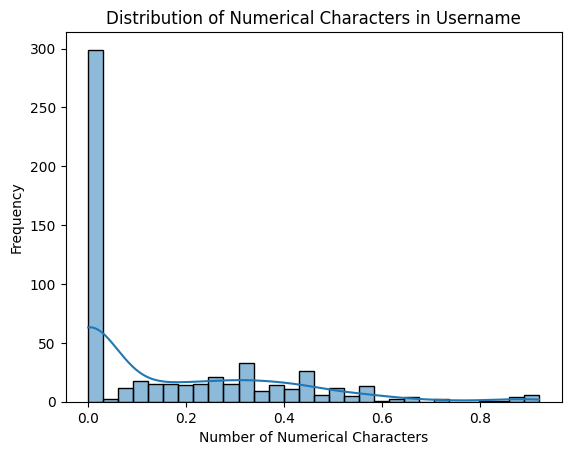

In [ ]:
sns.histplot(train_data['nums/length username'], bins=30, kde=True)
plt.title('Distribution of Numerical Characters in Username')
plt.xlabel('Number of Numerical Characters')
plt.ylabel('Frequency')
plt.show()


In [ ]:
train_data['fullname words'].value_counts()

1     283
2     187
0      57
3      34
4       7
5       4
6       2
12      1
10      1
Name: fullname words, dtype: int64

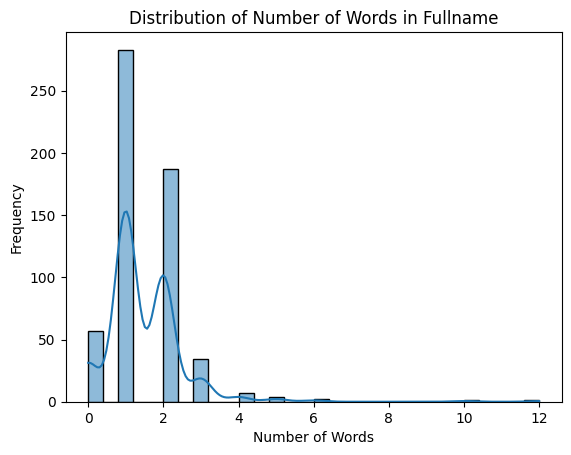

In [ ]:
sns.histplot(train_data['fullname words'], bins=30, kde=True)
plt.title('Distribution of Number of Words in Fullname')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

In [ ]:
train_data['nums/length fullname'].value_counts()

0.00    518
0.33     11
0.40      7
0.25      4
0.50      3
0.31      3
1.00      3
0.22      3
0.24      3
0.43      2
0.36      2
0.12      2
0.18      2
0.44      2
0.38      1
0.57      1
0.27      1
0.29      1
0.20      1
0.89      1
0.11      1
0.14      1
0.08      1
0.10      1
0.46      1
Name: nums/length fullname, dtype: int64

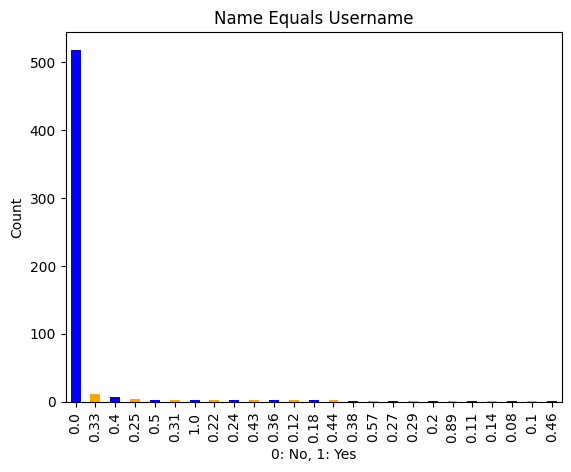

In [ ]:
train_data['nums/length fullname'].value_counts().plot(kind='bar', color=['blue', 'orange'])
plt.title('Name Equals Username')
plt.xlabel('0: No, 1: Yes')
plt.ylabel('Count')
plt.show()

In [ ]:
train_data['name==username'].value_counts()

0    556
1     20
Name: name==username, dtype: int64

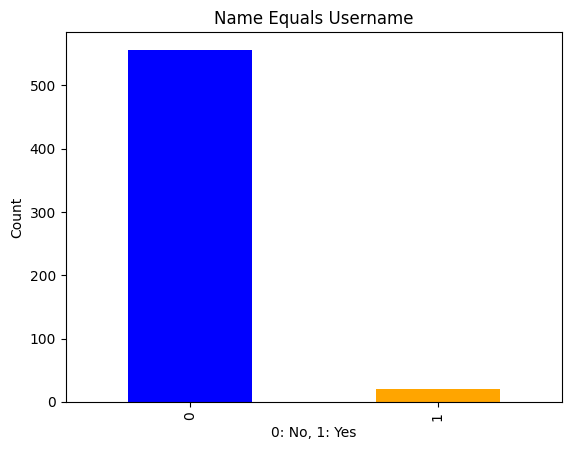

In [ ]:
train_data['name==username'].value_counts().plot(kind='bar', color=['blue', 'orange'])
plt.title('Name Equals Username')
plt.xlabel('0: No, 1: Yes')
plt.ylabel('Count')
plt.show()


In [ ]:
train_data['description length'].value_counts()

0      326
35       8
2        7
23       6
50       6
      ... 
29       1
131      1
56       1
72       1
14       1
Name: description length, Length: 104, dtype: int64

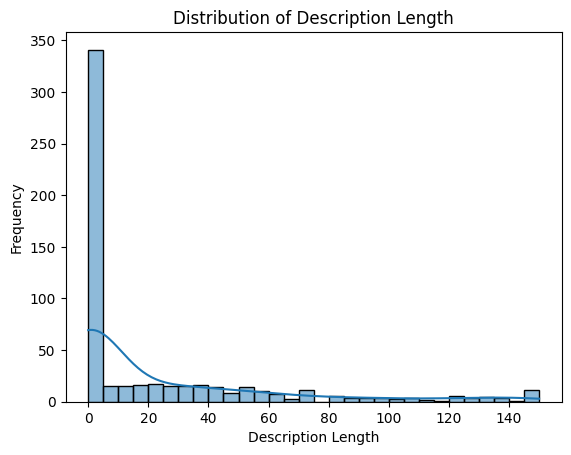

In [ ]:
sns.histplot(train_data['description length'], bins=30, kde=True)
plt.title('Distribution of Description Length')
plt.xlabel('Description Length')
plt.ylabel('Frequency')
plt.show()

In [ ]:
train_data['external URL'].value_counts()

0    509
1     67
Name: external URL, dtype: int64

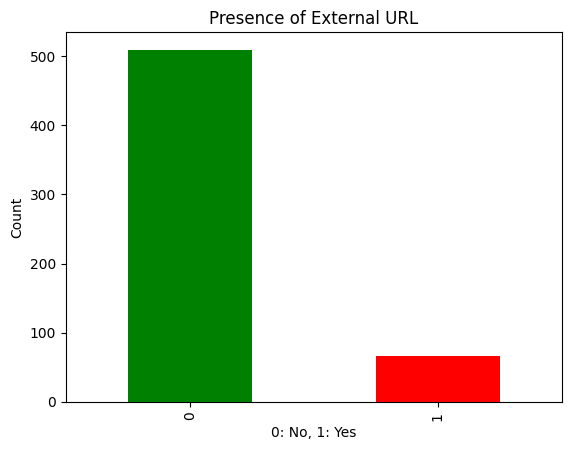

In [ ]:
train_data['external URL'].value_counts().plot(kind='bar', color=['green', 'red'])
plt.title('Presence of External URL')
plt.xlabel('0: No, 1: Yes')
plt.ylabel('Count')
plt.show()


In [ ]:
train_data['private'].value_counts()

0    356
1    220
Name: private, dtype: int64

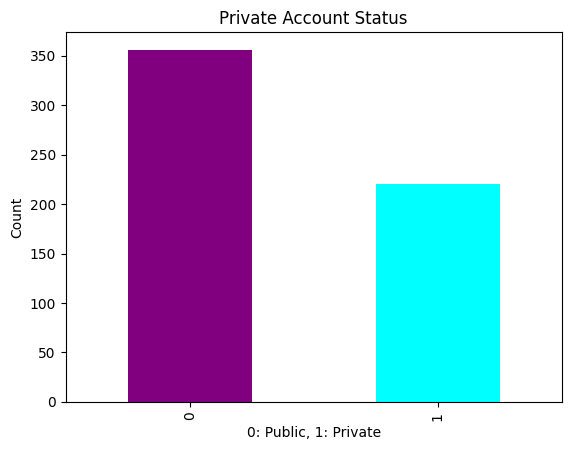

In [ ]:
train_data['private'].value_counts().plot(kind='bar', color=['purple', 'cyan'])
plt.title('Private Account Status')
plt.xlabel('0: Public, 1: Private')
plt.ylabel('Count')
plt.show()

In [ ]:
train_data['#posts'].value_counts()

0      157
1       28
2       22
5       15
3       14
      ... 
711      1
416      1
50       1
286      1
102      1
Name: #posts, Length: 193, dtype: int64

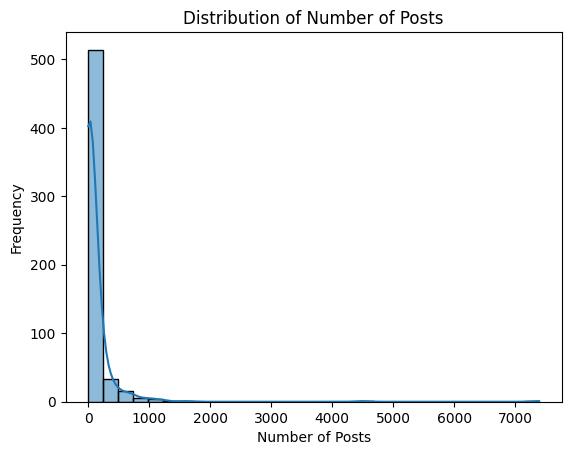

In [ ]:
sns.histplot(train_data['#posts'], bins=30, kde=True)
plt.title('Distribution of Number of Posts')
plt.xlabel('Number of Posts')
plt.ylabel('Frequency')
plt.show()

In [ ]:
train_data['#followers'].value_counts()

0      18
49      9
16      8
15      8
1       7
       ..
192     1
200     1
484     1
650     1
126     1
Name: #followers, Length: 372, dtype: int64

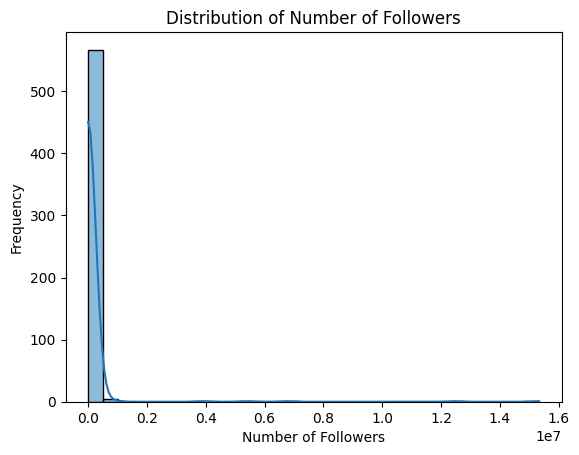

In [ ]:
sns.histplot(train_data['#followers'], bins=30, kde=True)
plt.title('Distribution of Number of Followers')
plt.xlabel('Number of Followers')
plt.ylabel('Frequency')
plt.show()

In [ ]:
train_data['#follows'].value_counts()

0       11
1        6
26       6
37       5
22       5
        ..
1196     1
446      1
399      1
535      1
487      1
Name: #follows, Length: 400, dtype: int64

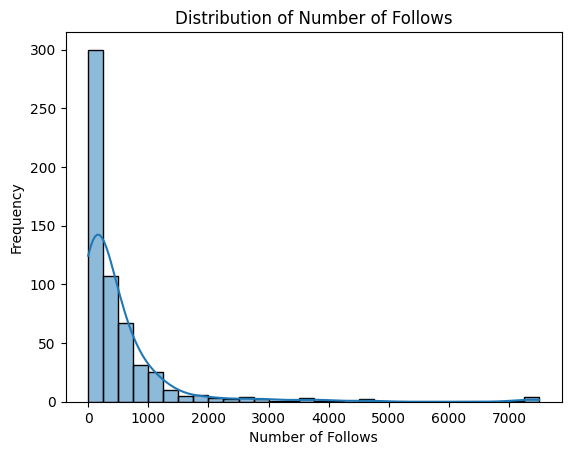

In [ ]:
sns.histplot(train_data['#follows'], bins=30, kde=True)
plt.title('Distribution of Number of Follows')
plt.xlabel('Number of Follows')
plt.ylabel('Frequency')
plt.show()

In [ ]:
train_data['fake'].value_counts()

0    288
1    288
Name: fake, dtype: int64

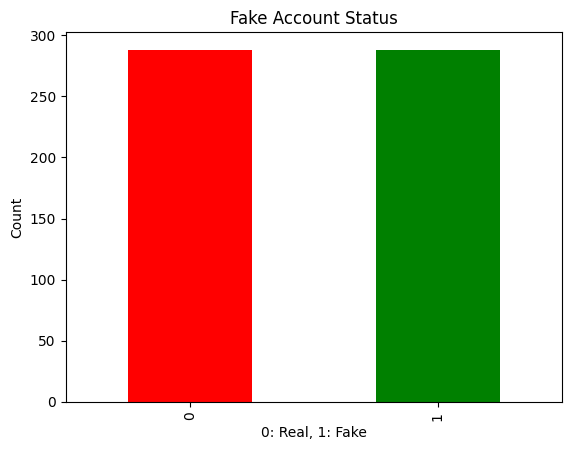

In [ ]:
train_data['fake'].value_counts().plot(kind='bar', color=['red', 'green'])
plt.title('Fake Account Status')
plt.xlabel('0: Real, 1: Fake')
plt.ylabel('Count')
plt.show()

# Bivariate Analysis:

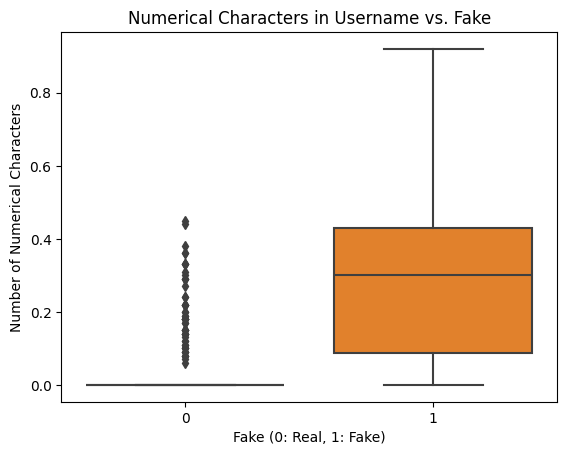

In [ ]:
sns.boxplot(x='fake', y='nums/length username', data=train_data)
plt.title('Numerical Characters in Username vs. Fake')
plt.xlabel('Fake (0: Real, 1: Fake)')
plt.ylabel('Number of Numerical Characters')
plt.show()

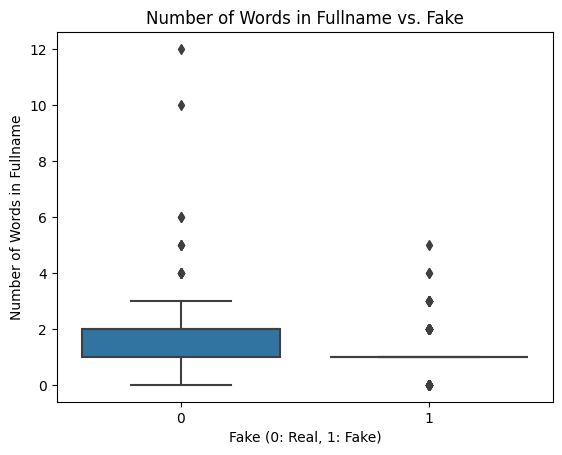

In [ ]:
sns.boxplot(x='fake', y='fullname words', data=train_data)
plt.title('Number of Words in Fullname vs. Fake')
plt.xlabel('Fake (0: Real, 1: Fake)')
plt.ylabel('Number of Words in Fullname')
plt.show()


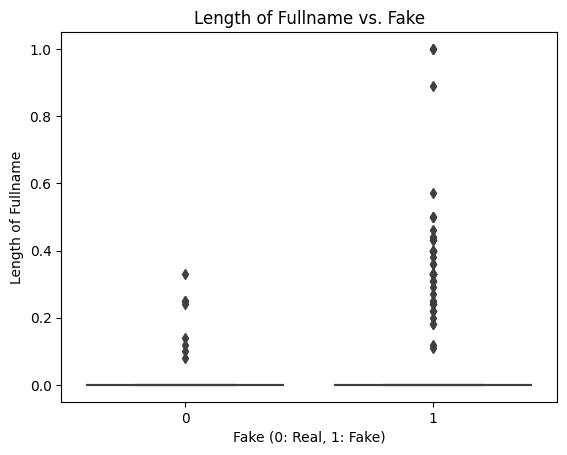

In [ ]:
sns.boxplot(x='fake', y='nums/length fullname', data=train_data)
plt.title('Length of Fullname vs. Fake')
plt.xlabel('Fake (0: Real, 1: Fake)')
plt.ylabel('Length of Fullname')
plt.show()

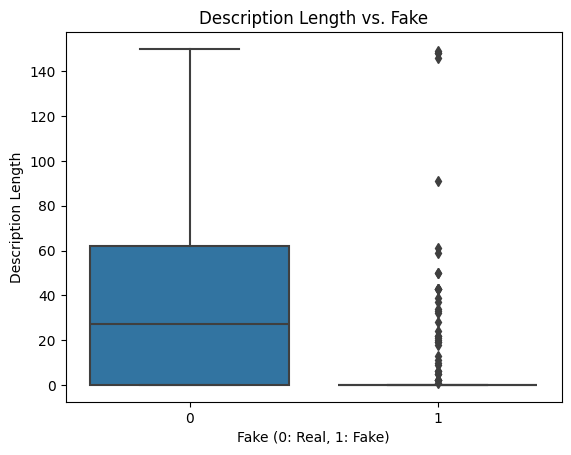

In [ ]:
sns.boxplot(x='fake', y='description length', data=train_data)
plt.title('Description Length vs. Fake')
plt.xlabel('Fake (0: Real, 1: Fake)')
plt.ylabel('Description Length')
plt.show()

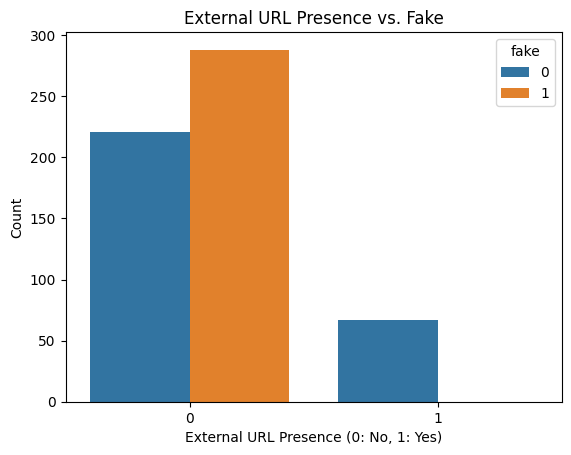

In [ ]:
sns.countplot(x='external URL', hue='fake', data=train_data)
plt.title('External URL Presence vs. Fake')
plt.xlabel('External URL Presence (0: No, 1: Yes)')
plt.ylabel('Count')
plt.show()

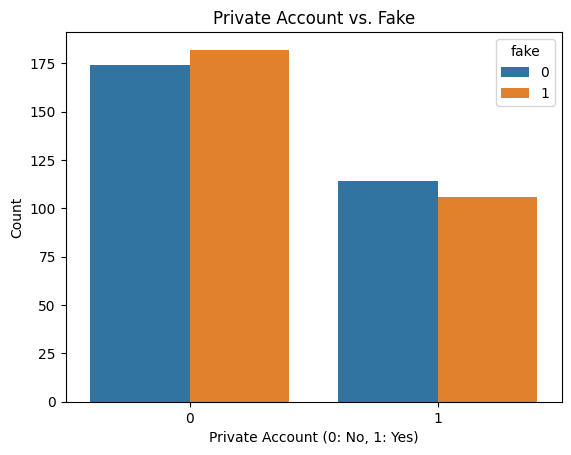

In [ ]:
sns.countplot(x='private', hue='fake', data=train_data)
plt.title('Private Account vs. Fake')
plt.xlabel('Private Account (0: No, 1: Yes)')
plt.ylabel('Count')
plt.show()

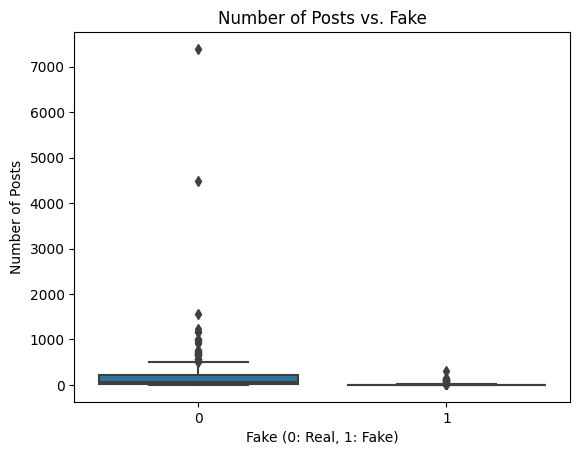

In [ ]:
sns.boxplot(x='fake', y='#posts', data=train_data)
plt.title('Number of Posts vs. Fake')
plt.xlabel('Fake (0: Real, 1: Fake)')
plt.ylabel('Number of Posts')
plt.show()

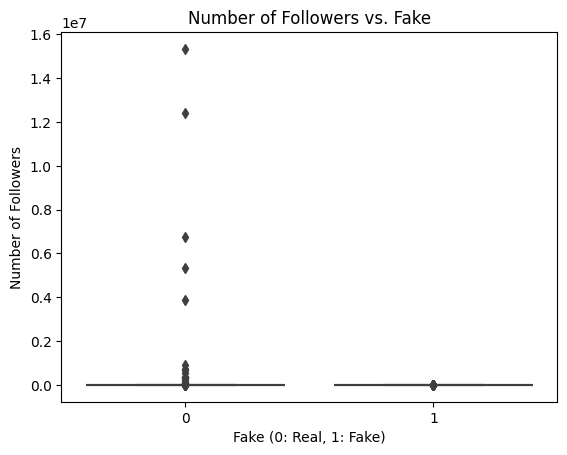

In [ ]:
sns.boxplot(x='fake', y='#followers', data=train_data)
plt.title('Number of Followers vs. Fake')
plt.xlabel('Fake (0: Real, 1: Fake)')
plt.ylabel('Number of Followers')
plt.show()

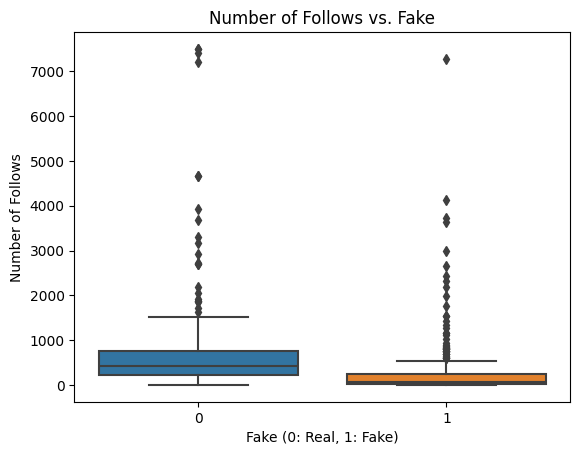

In [ ]:
sns.boxplot(x='fake', y='#follows', data=train_data)
plt.title('Number of Follows vs. Fake')
plt.xlabel('Fake (0: Real, 1: Fake)')
plt.ylabel('Number of Follows')
plt.show()

# Feature Engineering:

In [ ]:
from sklearn.preprocessing import MinMaxScaler# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the data
scaled_data = scaler.fit_transform(train_data)

# Convert the scaled data back to a DataFrame
train_data_scaled = pd.DataFrame(scaled_data, columns=train_data.columns)

# Display the scaled DataFrame
print("\nScaled DataFrame:")
train_data_scaled


Scaled DataFrame:


,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
0,1.0,0.293478,0.000000,0.00,0.0,0.353333,0.0,0.0,0.004331,0.000065,0.127333,0.0
1,1.0,0.000000,0.166667,0.00,0.0,0.293333,0.0,0.0,0.038706,0.000179,0.071067,0.0
2,1.0,0.108696,0.166667,0.00,0.0,0.000000,0.0,1.0,0.001759,0.000010,0.013067,0.0
3,1.0,0.000000,0.083333,0.00,0.0,0.546667,0.0,0.0,0.091893,0.000027,0.086800,0.0
4,1.0,0.000000,0.166667,0.00,0.0,0.000000,0.0,1.0,0.000812,0.000010,0.016800,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
571,1.0,0.597826,0.083333,0.44,0.0,0.000000,0.0,0.0,0.004466,0.000011,0.079467,1.0
572,1.0,0.413043,0.083333,0.33,0.0,0.140000,0.0,0.0,0.005955,0.000004,0.010000,1.0
573,1.0,0.619565,0.166667,0.00,0.0,0.000000,0.0,0.0,0.000541,0.000006,0.045200,1.0
574,1.0,0.619565,0.083333,0.00,0.0,0.073333,0.0,0.0,0.000000,0.000004,0.009733,1.0


In [ ]:
train_data['#posts'] = train_data['#posts'].astype(int)
train_data['#followers'] = train_data['#followers'].astype(int)
train_data['#follows'] = train_data['#follows'].astype(int)

In [ ]:
train_data

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
0,1,0.27,0,0.00,0,53,0,0,32,1000,955,0
1,1,0.00,2,0.00,0,44,0,0,286,2740,533,0
2,1,0.10,2,0.00,0,0,0,1,13,159,98,0
3,1,0.00,1,0.00,0,82,0,0,679,414,651,0
4,1,0.00,2,0.00,0,0,0,1,6,151,126,0
...,...,...,...,...,...,...,...,...,...,...,...,...
571,1,0.55,1,0.44,0,0,0,0,33,166,596,1
572,1,0.38,1,0.33,0,21,0,0,44,66,75,1
573,1,0.57,2,0.00,0,0,0,0,4,96,339,1
574,1,0.57,1,0.00,0,11,0,0,0,57,73,1


In [ ]:
train_data['fake'] = train_data['fake'].astype(int)

In [ ]:
train_data

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
0,1,0.27,0,0.00,0,53,0,0,32,1000,955,0
1,1,0.00,2,0.00,0,44,0,0,286,2740,533,0
2,1,0.10,2,0.00,0,0,0,1,13,159,98,0
3,1,0.00,1,0.00,0,82,0,0,679,414,651,0
4,1,0.00,2,0.00,0,0,0,1,6,151,126,0
...,...,...,...,...,...,...,...,...,...,...,...,...
571,1,0.55,1,0.44,0,0,0,0,33,166,596,1
572,1,0.38,1,0.33,0,21,0,0,44,66,75,1
573,1,0.57,2,0.00,0,0,0,0,4,96,339,1
574,1,0.57,1,0.00,0,11,0,0,0,57,73,1


# Data Preparation:

In [ ]:
# Drop original columns that were transformed
train_data = train_data.drop(columns=['nums/length fullname'])

# Save the cleaned and processed dataset
train_data.to_csv('processed_dataset.csv', index=False)

# Display the processed DataFrame
print("\nProcessed DataFrame:")
print(train_data.head())



Processed DataFrame:
   profile pic  name==username  description length  external URL  private  \
0            1               0                  53             0        0   
1            1               0                  44             0        0   
2            1               0                   0             0        1   
3            1               0                  82             0        0   
4            1               0                   0             0        1   

   #posts  #followers  #follows  fake  
0      32        1000       955     0  
1     286        2740       533     0  
2      13         159        98     0  
3     679         414       651     0  
4       6         151       126     0  


In [ ]:
# Check for class imbalance
print("\nClass distribution in target variable:")
print(train_data['fake'].value_counts())


Class distribution in target variable:
0    288
1    288
Name: fake, dtype: int64


In [ ]:
# Check feature correlation
print("\nFeature correlation matrix:")
print(train_data.corr())


Feature correlation matrix:
                      profile pic  nums/length fullname  name==username  \
profile pic              1.000000             -0.131756       -0.124903   
nums/length fullname    -0.131756              1.000000        0.291149   
name==username          -0.124903              0.291149        1.000000   
description length       0.367892             -0.117521       -0.064814   
external URL             0.236729             -0.088724       -0.039232   
private                  0.114732             -0.030030        0.046084   
#posts                   0.169570             -0.057716       -0.049808   
#followers               0.061137             -0.027035       -0.017761   
#follows                 0.194833             -0.067971       -0.009529   
fake                    -0.637315              0.246782        0.170695   

                      description length  external URL   private    #posts  \
profile pic                     0.367892      0.236729  0.114732  0

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = train_data.drop(['fake', 'profile pic'], axis=1)
y = train_data['fake']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=23)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Predict on the test data
y_pred = rf_classifier.predict(X_test)

y_pred

array([0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 1])

In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.9137931034482759


In [ ]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.91      0.91        55
           1       0.92      0.92      0.92        61

    accuracy                           0.91       116
   macro avg       0.91      0.91      0.91       116
weighted avg       0.91      0.91      0.91       116




Confusion Matrix:
[[50  5]
 [ 5 56]]


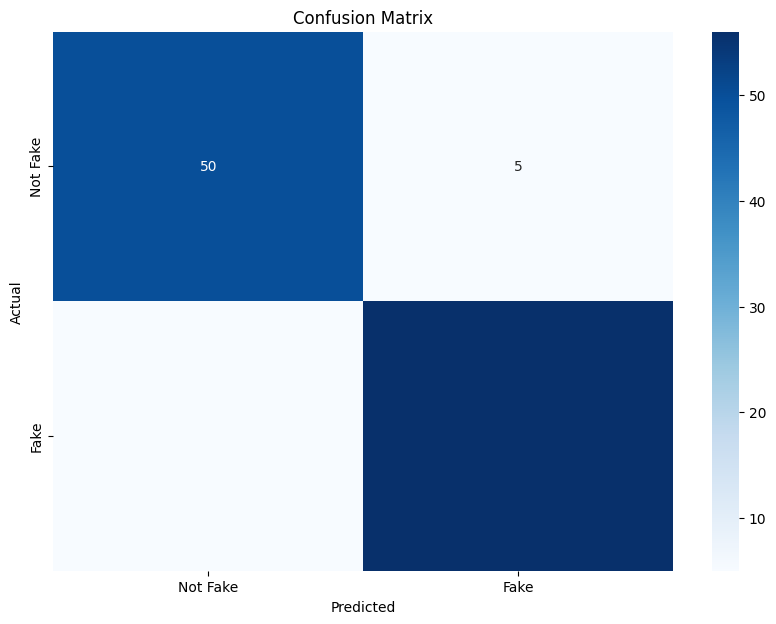

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

# Plot confusion matrix using seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Fake', 'Fake'], yticklabels=['Not Fake', 'Fake'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()